# Self-Adversarial Training incorporating Forgery Attention for Image Forgery Localization

## Please run this demo under requiered environment and jupyter notebook.
### The pretrained model of NIST is provided in checkpoints.

# 1. Import the Libs and Model

In [1]:
import os
import numpy as np 
import cv2
from models.model import locatenet
from models.utils import load_rgb,load_mask
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
model = locatenet()
model.load_weights('checkpoints/NIST_pretrain.h5')
print (model.summary())

W0614 18:16:55.338933 139798063015744 deprecation_wrapper.py:119] From /home/zhuol/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 18:16:56.535451 139798063015744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/nn_impl.py:180: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, None, None, 9 234         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 5248        depthwise_conv2d_1[0][0]         
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 6 36928       conv2d_1[0][0]                   
____________________________________________________________________________________________

# 2. Load the Forged Image and Mask


In [3]:
line = 'samples/0_forgery.png samples/0_mask.png'
forgery, mask = load_rgb(line),load_mask(line)

In [4]:
def show_img(imgs):
    plt.figure(figsize=(15,15))
    for i in range(len(imgs)):
        plt.subplot(1,len(imgs),i+1)
        if imgs[i].shape[-1]==1:
            plt.imshow(imgs[i][:,:,0])
        else:
            plt.imshow(imgs[i])

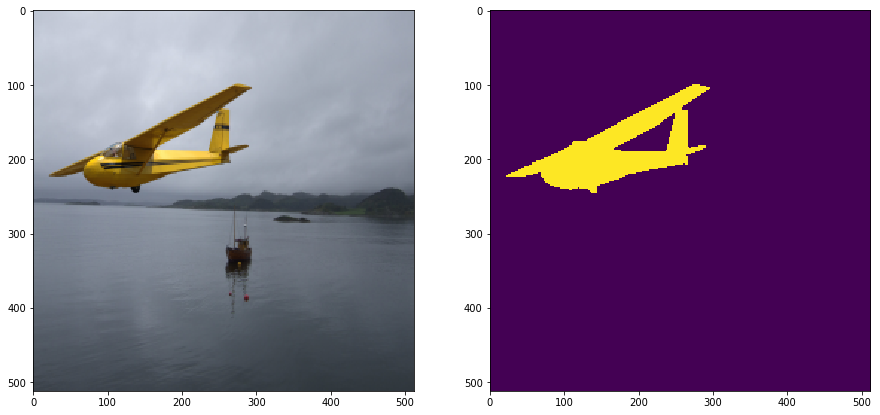

In [5]:
show_img([forgery,mask])

# 3. Predict the Forged Regions

In [6]:
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)

W0614 18:17:19.038455 139798063015744 deprecation_wrapper.py:119] From /home/zhuol/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



1/1 [==============================] - 2s 2s/step


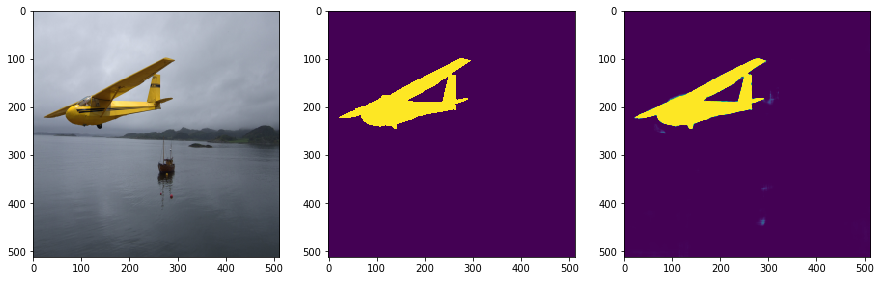

In [7]:
show_img([forgery[0],mask,pred[1][0]])

# 4. More Examples

## Splicing

1/1 [==============================] - 0s 134ms/step


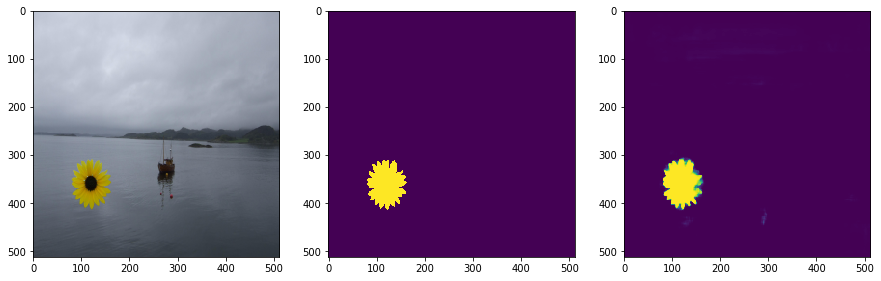

In [8]:
line = 'samples/1_forgery.png samples/1_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

1/1 [==============================] - 0s 128ms/step


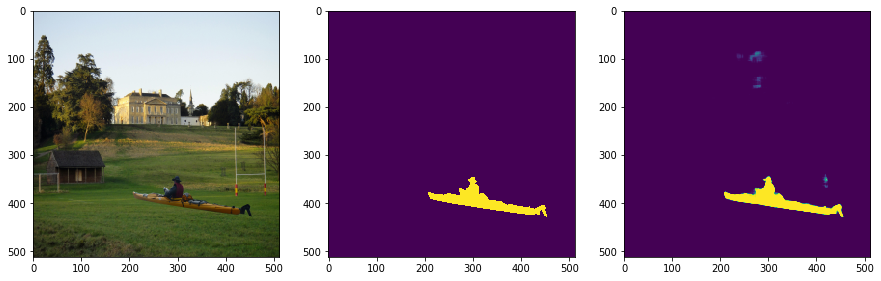

In [9]:
line = 'samples/2_forgery.png samples/2_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

1/1 [==============================] - 0s 126ms/step


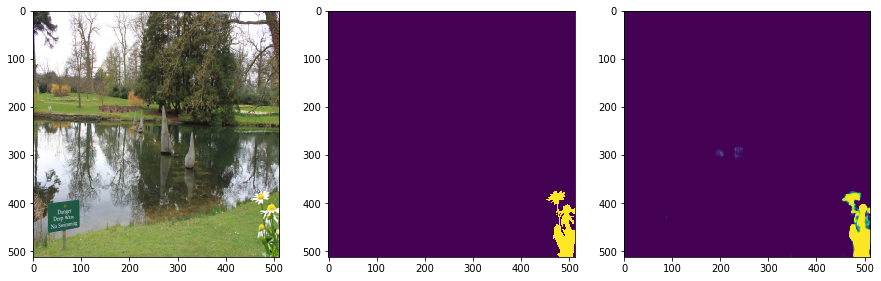

In [12]:
line = 'samples/5_forgery.png samples/5_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

1/1 [==============================] - 0s 127ms/step


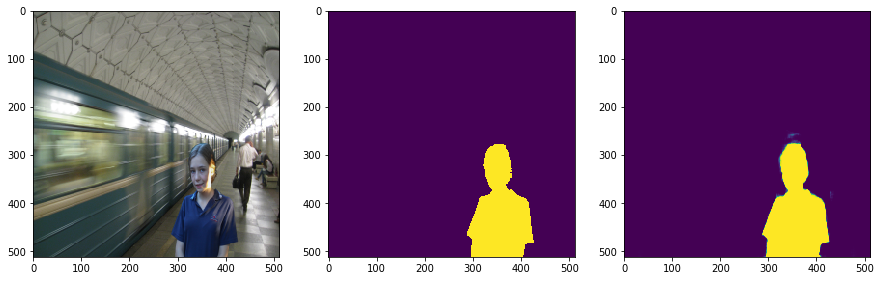

In [15]:
line = 'samples/6_forgery.png samples/6_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

## Removal

1/1 [==============================] - 0s 134ms/step


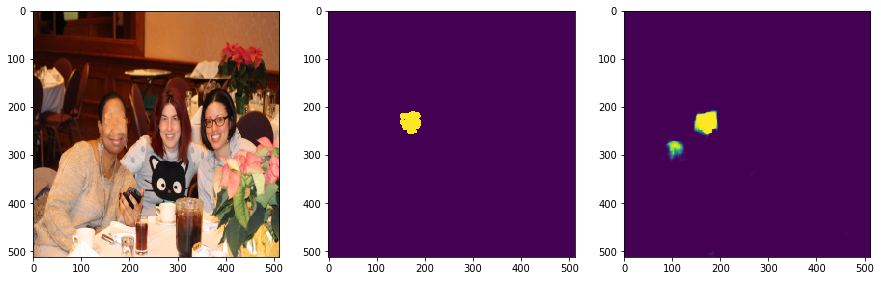

In [10]:
line = 'samples/3_forgery.png samples/3_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

1/1 [==============================] - 0s 126ms/step


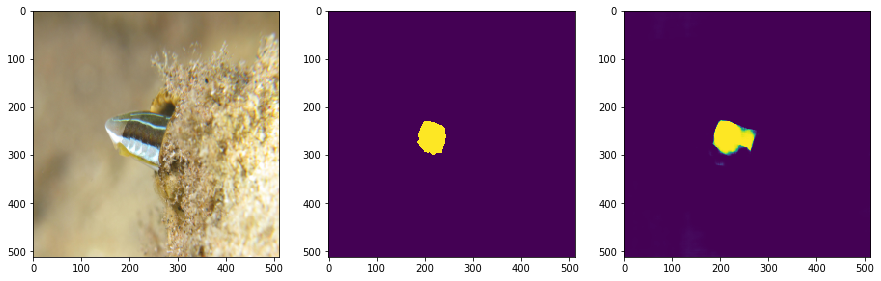

In [11]:
line = 'samples/4_forgery.png samples/4_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])

## Copy-Move

1/1 [==============================] - 0s 135ms/step


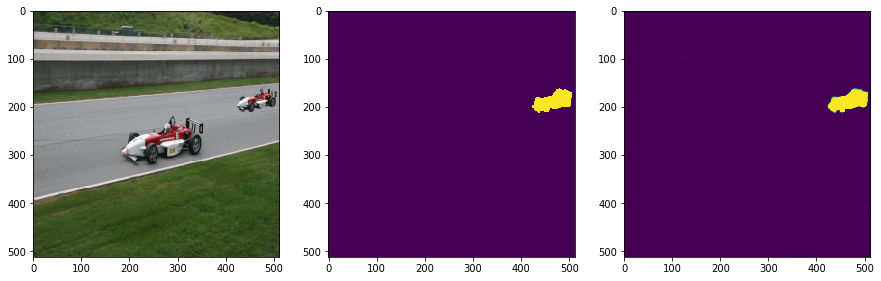

In [16]:
line = 'samples/7_forgery.png samples/7_mask.png'
forgery, mask = load_rgb(line),load_mask(line)
if len(forgery.shape)==3:
    forgery = np.expand_dims(forgery,axis=0)
pred = model.predict(forgery/255.,verbose=1)
show_img([forgery[0],mask,pred[1][0]])